<a href="https://colab.research.google.com/github/SHR150/Sentiment-Analysis-Major-Project/blob/main/Final_SmartKnower_MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SmartKnower Internship Major project

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow import keras

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Error downloading 'stopwords' from
[nltk_data]     <https://raw.githubusercontent.com/nltk/nltk_data/gh-
[nltk_data]     pages/packages/corpora/stopwords.zip>:   HTTP Error
[nltk_data]     500: Internal Server Error


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')
df.head()


,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [7]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df['review'] = df['review'].apply(remove_punctuations)
df

,review,rating
0,It was nice produt I like its design a lot It...,5
1,awesome soundvery pretty to see this nd the so...,5
2,awesome sound quality pros 78 hrs of battery l...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
...,...,...
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever usedREAD MORE,5


In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
tokenizer=RegexpTokenizer(r'\w+')
df['review']=df['review'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['review']

0       [it, was, nice, produt, i, like, its, design, ...
1       [awesome, soundvery, pretty, to, see, this, nd...
2       [awesome, sound, quality, pros, 78, hrs, of, b...
3       [i, think, it, is, such, a, good, product, not...
4       [awesome, bass, sound, quality, very, good, be...
                              ...                        
9971                                     [goodread, more]
9972    [everything, is, amazimg, but, the, built, is,...
9973                                     [goodread, more]
9974     [best, headphone, i, have, ever, usedread, more]
9975                                     [niceread, more]
Name: review, Length: 9976, dtype: object

In [ ]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
x = df.iloc[:,0].values
y = df.iloc[:,1].values
print(x)
print(y)

[list(['it', 'was', 'nice', 'produt', 'i', 'like', 'its', 'design', 'a', 'lot', 'its', 'easy', 'to', 'carry', 'and', 'looked', 'stylishread', 'more'])
 list(['awesome', 'soundvery', 'pretty', 'to', 'see', 'this', 'nd', 'the', 'sound', 'quality', 'was', 'too', 'good', 'i', 'wish', 'to', 'take', 'this', 'product', 'loved', 'this', 'product', 'read', 'more'])
 list(['awesome', 'sound', 'quality', 'pros', '78', 'hrs', 'of', 'battery', 'life', 'including', '45', 'mins', 'approx', 'call', 'timeawesome', 'sound', 'output', 'bass', 'and', 'treble', 'are', 'really', 'very', 'clear', 'without', 'equaliser', 'with', 'equaliser', 'sound', 'wary', 'depends', 'on', 'the', 'handset', 'sound', 'qualityweightless', 'to', 'carry', 'and', 'in', 'head', 'toomic', 'is', 'good', 'but', 'in', 'traffic', 'it', 'is', 'not', 'too', 'good', '325535mm', 'option', 'is', 'really', 'important', 'to', 'mention', 'really', 'expecting', 'other', 'leading', 'brands', 'to', 'implement', 'thisconsvery', 'tight', 'in', 'ea

In [ ]:
len(x)

9976

In [10]:
def dummy_fun(doc):
    return doc

vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)  

x = vectorizer.fit_transform(x)

In [11]:
x = x.toarray()

In [12]:

x.shape

(9976, 9932)

In [13]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0,stratify = y)

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7482, 9932)
(7482,)
(2494, 9932)
(2494,)


In [15]:
np.unique(y_train)

array([1, 2, 3, 4, 5])

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import SVC

In [ ]:
# text_model = Pipeline([('tfidf',TfidfVectorizer()),('model',SVC())]) 

In [ ]:
# text_model.fit(x_train,y_train)

In [ ]:
# y_pred = text_model.predict(x_test)
# y_pred

In [ ]:
# from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# accuracy_score(y_pred,y_test)*100

In [ ]:
# confusion_matrix(y_pred,y_test)

In [ ]:
# print(classification_report(y_pred,y_test))

In [ ]:
# text_model.predict(["Very bad product.  Within 5 days it's mic was out of work. I am very disappointed tobuythisproduct. I will never suggest to anyone for buying this product."])

In [16]:
y_train_1 = keras.utils.to_categorical(y_train)
y_test_1 = keras.utils.to_categorical(y_test)

In [17]:
y_train_1 = y_train_1[:, 1:]
y_test_1 = y_test_1[:, 1:]

In [18]:

y_train_1.shape

(7482, 5)

In [19]:
y_test_1.shape

(2494, 5)

In [20]:
model = keras.models.Sequential([keras.layers.BatchNormalization(input_dim=x_train.shape[1]),
                                 keras.layers.Dense(100,kernel_initializer="he_normal"),
                                 keras.layers.PReLU(),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.2),
                                 keras.layers.Dense(50,kernel_initializer="he_normal"),
                                 keras.layers.PReLU(),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(5, "softmax"),
                                 ])

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)



In [21]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 9932)              39728     
_________________________________________________________________
dense (Dense)                (None, 100)               993300    
_________________________________________________________________
p_re_lu (PReLU)              (None, 100)               100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 50)                5

In [22]:
history = model.fit(x_train, y_train_1, validation_data=(x_test, y_test_1), epochs=50, callbacks=[early_stopping_cb])

Epoch 1/50
234/234 [==============================] - 6s 20ms/step - loss: 1.6217 - accuracy: 0.4363 - val_loss: 1.1573 - val_accuracy: 0.5738
Epoch 2/50
234/234 [==============================] - 4s 18ms/step - loss: 0.7296 - accuracy: 0.7453 - val_loss: 0.9894 - val_accuracy: 0.6347
Epoch 3/50
234/234 [==============================] - 4s 18ms/step - loss: 0.5067 - accuracy: 0.8254 - val_loss: 1.2294 - val_accuracy: 0.5978
Epoch 4/50
234/234 [==============================] - 4s 19ms/step - loss: 0.4454 - accuracy: 0.8426 - val_loss: 1.5010 - val_accuracy: 0.5630
Epoch 5/50
234/234 [==============================] - 4s 18ms/step - loss: 0.4117 - accuracy: 0.8446 - val_loss: 1.7078 - val_accuracy: 0.5674
Epoch 6/50
234/234 [==============================] - 4s 18ms/step - loss: 0.3849 - accuracy: 0.8572 - val_loss: 2.0731 - val_accuracy: 0.4611
Epoch 7/50
234/234 [==============================] - 4s 18ms/step - loss: 0.3669 - accuracy: 0.8630 - val_loss: 1.7943 - val_accuracy: 0.5662

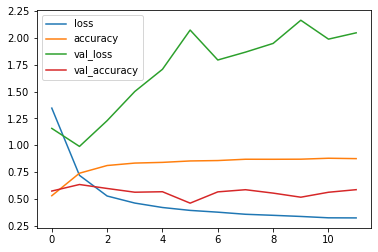

In [23]:

import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()

In [24]:
!pip install streamlit
!pip install pyngrok==4.1.1
from pyngrok import ngrok

     |████████████████████████████████| 7.5MB 5.2MB/s 
     |████████████████████████████████| 81kB 8.4MB/s 
     |████████████████████████████████| 112kB 49.6MB/s 
     |████████████████████████████████| 4.6MB 39.7MB/s 
     |████████████████████████████████| 163kB 40.4MB/s 
     |████████████████████████████████| 122kB 48.1MB/s 
     |████████████████████████████████| 71kB 6.7MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=d26e6443356b415bd10ece801380b843c502a886fa79f03a1251e6c50ada00d4
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.0 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp37-none-any.whl size=15971 sha256=31b6786e74bd52328a684a48d823a150067902692f1b93f96e577b86c1efb0f7
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok


In [26]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
# import tensorflow as tf
# from tensorflow import keras
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

df = pd.read_csv('data.csv')

def remove_punctuations(text):
for punctuation in string.punctuation:
text = text.replace(punctuation, '')
return text

df['review'] = df['review'].apply(remove_punctuations)

# tokenizer=RegexpTokenizer(r'\w+')
# df['review']=df['review'].apply(lambda x: tokenizer.tokenize(x.lower()))

# def removestopwords(s):
# words=[i for i in s if i not in stopwords.words('english')]
# print(words)
# return words


x = df.iloc[:,0].values
y = df.iloc[:,1].values

# def dummy_fun(doc):
# return doc

# vectorizer = TfidfVectorizer(
# analyzer='word',
# tokenizer=dummy_fun,
# preprocessor=dummy_fun,
# token_pattern=None)

# x = vectorizer.fit_transform(x)
# x = x.toarray()

# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5,random_state = 0,stratify = y)
text_model = Pipeline([('tfidf',TfidfVectorizer()),('model',SVC())])
text_model.fit(x,y)

# y_train = keras.utils.to_categorical(y_train)
# y_test = keras.utils.to_categorical(y_test)

# y = keras.utils.to_categorical(y)
# y = y[:, 1:]

# y_train = y_train[:, 1:]
# y_test = y_test[:, 1:]

# model = keras.models.Sequential([keras.layers.BatchNormalization(input_dim=x_train.shape[1]),
# keras.layers.Dense(100,kernel_initializer="he_normal"),
# keras.layers.PReLU(),
# keras.layers.BatchNormalization(),
# keras.layers.Dropout(0.2),
# keras.layers.Dense(50,kernel_initializer="he_normal"),
# keras.layers.PReLU(),
# keras.layers.BatchNormalization(),
# keras.layers.Dense(5, "softmax"),
# ])

# model.compile(loss="categorical_crossentropy",
# optimizer=keras.optimizers.Adam(),
# metrics="accuracy")

# early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# history = model.fit(x_train, y_train,validation_data=(x_test,y_test),
# epochs=50, callbacks=[early_stopping_cb])

# model = SVC()
# model.fit(x_train,y_train)

st.title('sentiment analysis')
select = st.text_input('Enter your message')

# select = remove_punctuations(select)
# select = tokenizer.tokenize(select.lower())
# select = vectorizer.transform([select]).toarray()
# output = np.argmax(model.predict(select), axis=-1)
output = text_model.predict([select])
st.title(output[0])

Overwriting app.py


In [27]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://03b4956178fb.ngrok.io'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df['review'] = df['review'].apply(remove_punctuations)

tokenizer=RegexpTokenizer(r'\w+')
df['review']=df['review'].apply(lambda x: tokenizer.tokenize(x.lower()))

def removestopwords(s):
  words=[i for i in s if i not in stopwords.words('english')]
  print(words)
  return words

x = df.iloc[:,0].values
y = df.iloc[:,1].values

def dummy_fun(doc):
    return doc

vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)  

x = vectorizer.fit_transform(x)
x = x.toarray()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.05,random_state = 0,stratify = y)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# y = keras.utils.to_categorical(y)
# y = y[:, 1:]

y_train = y_train[:, 1:]
y_test = y_test[:, 1:]

model = keras.models.Sequential([keras.layers.BatchNormalization(input_dim=x_train.shape[1]),
                                 keras.layers.Dense(100,kernel_initializer="he_normal"),
                                 keras.layers.PReLU(),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.2),
                                 keras.layers.Dense(50,kernel_initializer="he_normal"),
                                 keras.layers.PReLU(),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(5, "softmax"),
                                 ])

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics="accuracy")

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train,validation_data=(x_test,y_test),
                    epochs=50, callbacks=[early_stopping_cb])

Epoch 1/50
297/297 [==============================] - 6s 16ms/step - loss: 1.4970 - accuracy: 0.4615 - val_loss: 1.0667 - val_accuracy: 0.5792
Epoch 2/50
297/297 [==============================] - 4s 15ms/step - loss: 0.7086 - accuracy: 0.7405 - val_loss: 1.0348 - val_accuracy: 0.6052
Epoch 3/50
297/297 [==============================] - 4s 15ms/step - loss: 0.5361 - accuracy: 0.8071 - val_loss: 1.4020 - val_accuracy: 0.6132
Epoch 4/50
297/297 [==============================] - 4s 15ms/step - loss: 0.4617 - accuracy: 0.8325 - val_loss: 2.2681 - val_accuracy: 0.4028
Epoch 5/50
297/297 [==============================] - 4s 15ms/step - loss: 0.4473 - accuracy: 0.8386 - val_loss: 1.6339 - val_accuracy: 0.5471
Epoch 6/50
297/297 [==============================] - 4s 15ms/step - loss: 0.3960 - accuracy: 0.8523 - val_loss: 2.1476 - val_accuracy: 0.4228
Epoch 7/50
297/297 [==============================] - 4s 15ms/step - loss: 0.3875 - accuracy: 0.8555 - val_loss: 1.7765 - val_accuracy: 0.5491